# **1000-719bMSB Modeling of Complex Biological Systems**
# **Deep Neural Network: Supervised Learning**

### Basic python and pandas
https://www.kaggle.com/lavanyashukla01/pandas-numpy-python-cheatsheet

https://www.utc.fr/~jlaforet/Suppl/python-cheatsheets.pdf

List comprehensions are a concise way to create new lists from existing ones.

In [ ]:
list1 = list(range(0,10))
print(list1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
list1[0] # A vector in R starts with an index of 1. In Python, 0.

0

In [ ]:
list1[2:5]

[2, 3, 4]

In [ ]:
list2 = []
for i in list1:
    list2.append(i+1)
    
print(list2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
list3 = [i+1 for i in list1]

print(list3)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


# Classification of MNIST using densely connected layers

We are going to use the Keras library to implement a neural network that can classify handwritten digits - in just a few lines of code.

First we load and inspect the data. The dataset is split into training and test data.

In [ ]:
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
print(tf.__version__)
tf.compat.v1.disable_eager_execution()

2.8.0


In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

Let's plot one of the digits and the corresponding label.

Label of element 0: 0


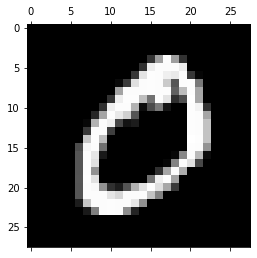

In [ ]:
print('Label of element 0:',train_labels[1])
plt.matshow(train_images[1], cmap='gray')
plt.show()

In this step we define the neural network. ReLu is an activation function defined as f(x) = max(0,x).

Softmax activation function is normalized such that the sum of all outputs is equal 1.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential() # model sekwencyjny
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) # 512 węzłów na outpucie, funkcja aktywacji mówi czy cos jest wazne
#units (here, 512) - Positive integer, dimensionality of the output space.
model.add(layers.Dense(10, activation='softmax')) # druga warstwa (gesta = wszyscy sie komunikuja, 10 wezlow, na kt )

With compile we tell the network which optimizer and loss function to use. Optimizer specifies the particular implementation of the gradient-descent, e.g. how it adapts the learning rate. 'Metrics' specifies the output during the training.

In [ ]:
model.compile(optimizer='rmsprop',
loss='mean_squared_error',
metrics=['accuracy'])

In [ ]:
model.summary()
"""
model dwuwarstwowy
param = parametry
"""

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


'\nmodel dwuwarstwowy\nparam = parametry\n'

We are using a densely connected network, so we have to flatten the images.  
Input values should be in the range (0,1) for fast convergence.  

In [ ]:
# splaszczamy obrazki (reshape)
# wartosci rowniez chcemy splaszczyć - nie od 0 do 255 tylko od 0 do 1, nie powinno to wplywac na jakosc predykcji (dzielnimy przez 255)
train_images_flat = train_images.reshape((60000, 28 * 28))
train_images_flat = train_images_flat.astype('float32') / 255
test_images_flat = test_images.reshape((10000, 28 * 28))
test_images_flat = test_images_flat.astype('float32') / 255

Convert the labels to a 'one-hot' coding.

In [ ]:
# labels to liczby od 0 do 1, zamieniamy cyferki na wektor 10-elementowy z 1 w odpowiednim miejscu, a na pozostalych pozycjach zera
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
train_images.reshape((60000,28*28)).shape

(60000, 784)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

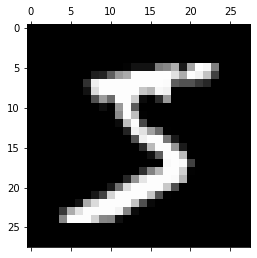

In [ ]:
plt.matshow(train_images[0], cmap='gray')
plt.show()
# takie same obrazki pomimo powyzszych modyfikacji

In [ ]:
model.fit(train_images_flat, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0120 - accuracy: 0.9216
Epoch 2/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0053 - accuracy: 0.9668
Epoch 3/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0037 - accuracy: 0.9772
Epoch 4/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0028 - accuracy: 0.9828
Epoch 5/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0022 - accuracy: 0.9863


Let's check the performance on the test set. If the accuracy is less than the training accuracy, then we might be overfitting!

In [ ]:
test_loss, test_acc = model.evaluate(test_images_flat, test_labels)
print('test_acc:', test_acc)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


test_acc: 0.9791


We can also find the predictions for a selection of input images.

In [ ]:
predictions = model.predict(train_images_flat[:10])

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[1.4460038e-07 9.9982506e-01 2.4462821e-05 8.5695365e-06 1.1718655e-05
 1.4847782e-07 1.4375648e-06 8.4735075e-05 4.2941978e-05 7.6158977e-07]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


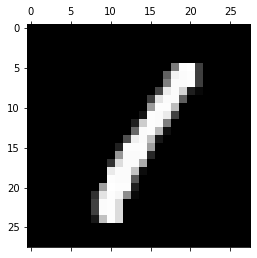

In [ ]:
img_num = 3
print(predictions[img_num])
print(train_labels[img_num])
plt.matshow(train_images[img_num], cmap='gray')
plt.show()

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
pred = model.predict(train_images_flat[:10000])
for i in range(0,10000):
  if sum(((pred[i]>0.5)+0)==train_labels[i]) != 10:
    print(i)
    break

80


[9.30046299e-05 5.49456365e-02 4.34214686e-04 8.53261277e-02
 2.23709594e-05 2.45533083e-02 1.31276865e-05 2.19975642e-04
 6.33735061e-02 7.71018684e-01]
0.7710187
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


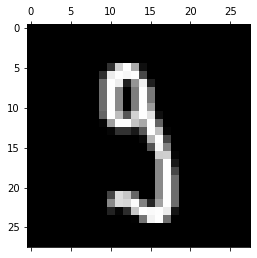

In [ ]:
img_num = 48
print(pred[img_num])
print(max(pred[img_num]))
print(train_labels[img_num])
plt.matshow(train_images[img_num], cmap='gray')
plt.show()

# Classification of MNIST using convolutional layers

We have build a classifier for handwritten images only using densely connected layers. Let's see if we can do better using convolutional layers!

First define the convolutional layers.

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

Now add a classifier on top of the convnet.

In [ ]:
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [ ]:
train_images_conv = train_images.reshape((60000, 28, 28, 1))
train_images_conv = train_images_conv.astype('float32') / 255
test_images_conv = test_images.reshape((10000, 28, 28, 1))
test_images_conv = test_images_conv.astype('float32') / 255

In [ ]:
model2.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
model2.fit(train_images_conv, train_labels, epochs=15, batch_size=64)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1671 - accuracy: 0.9471
Epoch 2/15
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0456 - accuracy: 0.9860
Epoch 3/15
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0308 - accuracy: 0.9905
Epoch 4/15
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0238 - accuracy: 0.9930
Epoch 5/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0193 - accuracy: 0.9941
Epoch 6/15
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0151 - accuracy: 0.9958
Epoch 7/15
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0133 - accuracy: 0.9962
Epoch 8/15
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0099 - accuracy: 0.9972
Epoch 9/15
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0086 - accuracy: 0.9975
Epoch 10/15
60

In [ ]:
test_loss, test_acc = model2.evaluate(test_images_conv, test_labels)
print(test_acc)
# bardzo wysokie acc, jeszcze większe niż wcześniej

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


0.992


## Introducing Fashion MNIST (Homework dataset)

---



The MNIST dataset is not too demanding, let's try something a little more difficult - Fashion MNIST.

[LINK TO IMAGE](https://s3-eu-central-1.amazonaws.com/zalando-wp-zalando-research-production/2017/08/fashion-mnist-sprite.png)

Check out labels on [GitHub](https://github.com/zalandoresearch/fashion-mnist)

In [ ]:
(train_imgs_fash, train_labels_fash), (test_imgs_fash, test_labels_fash) = keras.datasets.fashion_mnist.load_data()

In [ ]:
train_imgs_fash.shape

(60000, 28, 28)

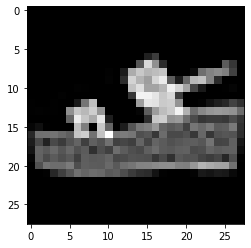

In [ ]:
plt.imshow(train_imgs_fash[12],  cmap=plt.get_cmap('gray'))

# **HOMEWORK 1**
Build a classifier for fashion MNIST.

**1. Use exactly the same architectures (both densely connected layers and from convolutional layers) as the above MNIST** e.g., replace the dataset. Save the Jupyter Notebook in its original format and output a PDF file after training, testing, and validation. Make sure to write down how do they perform (training accuracny, testing accuracy).  

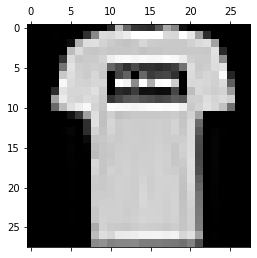

In [ ]:
plt.matshow(train_imgs_fash[1], cmap='gray')
plt.show()

In [ ]:
test_imgs_fash.shape

(10000, 28, 28)

In [ ]:
train_images_fash = train_imgs_fash.reshape((60000, 28*28))
test_images_fash = test_imgs_fash.reshape((10000, 28*28))

In [ ]:
train_images_fash = train_images_fash.astype('float32') / 255
test_images_fash = test_images_fash.astype('float32') / 255

In [ ]:
train_images_fash.shape

(60000, 784)

In [ ]:
train_images_fash

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Model 1:

In [ ]:
train_labels_fash_cat = to_categorical(train_labels_fash)
test_labels_fash_cat = to_categorical(test_labels_fash)

In [ ]:
train_labels_fash_cat[0]
len(train_labels_fash_cat[0])

10

In [ ]:
model.fit(train_images_fash, train_labels_fash_cat, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0356 - accuracy: 0.7538
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0201 - accuracy: 0.8610
Epoch 3/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0181 - accuracy: 0.8752
Epoch 4/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0169 - accuracy: 0.8838
Epoch 5/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0159 - accuracy: 0.8921


In [ ]:
test_loss, test_acc = model.evaluate(test_images_fash, test_labels_fash_cat)
print('test_acc:', test_acc)

test_acc: 0.8748


In [ ]:
predictions = model.predict(train_images_flat[:10])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

[2.3458201e-06 2.3421965e-08 9.9647917e-09 7.3558359e-09 3.1572916e-05
 9.9996364e-01 3.1972795e-07 1.6931763e-06 1.4067741e-07 1.9759429e-07]
prediction: Sandal


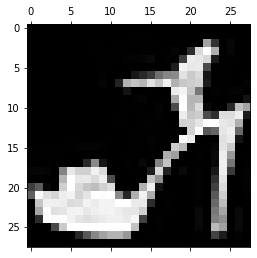

In [ ]:
img_num = 9
print(predictions[img_num])
L = list(train_labels_fash_cat[img_num])
print("prediction:", class_names[L.index(1.0)])

plt.matshow(train_imgs_fash[img_num], cmap='gray')
plt.show()

Model 2:

In [ ]:
train_images_fash_conv = train_images_fash.reshape((60000, 28, 28, 1))
train_images_fash_conv = train_images_fash_conv.astype('float32') / 255
test_images_fash_conv = test_images_fash.reshape((10000, 28, 28, 1))
test_images_fash_conv = test_images_fash_conv.astype('float32') / 255

In [ ]:
model2.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
model2.fit(train_images_fash_conv, train_labels_fash_cat, epochs=15, batch_size=64)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 62us/sample - loss: 1.7055 - accuracy: 0.3834
Epoch 2/15
60000/60000 [==============================] - 4s 59us/sample - loss: 0.7305 - accuracy: 0.7245
Epoch 3/15
60000/60000 [==============================] - 3s 58us/sample - loss: 0.6089 - accuracy: 0.7695
Epoch 4/15
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5369 - accuracy: 0.7981
Epoch 5/15
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4899 - accuracy: 0.8180
Epoch 6/15
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4575 - accuracy: 0.8320
Epoch 7/15
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4323 - accuracy: 0.8403
Epoch 8/15
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4115 - accuracy: 0.8476
Epoch 9/15
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3932 - accuracy: 0.8548
Epoch 10/15
60

In [ ]:
test_loss, test_acc = model2.evaluate(test_images_fash_conv, test_labels_fash_cat)
print('test_acc:', test_acc)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


test_acc: 0.8612


In [ ]:
predictions = model2.predict(train_images_fash_conv[:12])

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[8.1486434e-10 3.9205017e-09 3.7325520e-09 5.6216578e-09 2.2969337e-08
 2.7346010e-03 8.0644149e-08 2.1463669e-04 2.7656076e-06 9.9704796e-01]
prediction: Ankle boot


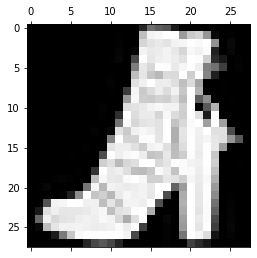

In [ ]:
img_num = 11
print(predictions[img_num])
L = list(train_labels_fash_cat[img_num])
print("prediction:", class_names[L.index(1.0)])

plt.matshow(train_imgs_fash[img_num], cmap='gray')
plt.show()

**2. Improve the architecture**. Experiment with different numbers of layers, size of layers, number of filters, size of filters. You are required to make those adjustment to get the highest accuracy. Watch out for overfitting -- we want the highest testing accuracy!
Please provide a PDF file of the result, the best test accuracy and the architecture (different numbers of layers, size of layers, number of filters, size of filters)

Model 3:

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images.reshape((60000,28*28))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # input_shape=(img_rows, img_cols, 1)
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((3, 3)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

In [ ]:
train_images_conv = train_images.reshape((60000, 28, 28, 1))
train_images_conv = train_images_conv.astype('float32') / 255
test_images_conv = test_images.reshape((10000, 28, 28, 1))
test_images_conv = test_images_conv.astype('float32') / 255

In [ ]:
model3.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       36992     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 64)          73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 1, 1, 64)         

In [ ]:
model3.fit(train_images_conv, train_labels, epochs=15, batch_size=64)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 110us/sample - loss: 0.5068 - accuracy: 0.8136
Epoch 2/15
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2957 - accuracy: 0.8924
Epoch 3/15
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2433 - accuracy: 0.9118
Epoch 4/15
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2142 - accuracy: 0.9224
Epoch 5/15
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1916 - accuracy: 0.9311
Epoch 6/15
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1741 - accuracy: 0.9368
Epoch 7/15
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1591 - accuracy: 0.9423
Epoch 8/15
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1451 - accuracy: 0.9474
Epoch 9/15
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1357 - accuracy: 0.9507
Epoch

In [ ]:
test_loss, test_acc = model3.evaluate(test_images_conv, test_labels)
print('test_acc:', test_acc)

test_acc: 0.9161


Model 4:

In [ ]:
model4 = models.Sequential()
# Add convolution 2D
model4.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.Flatten())
model4.add(layers.Dense(128, activation='relu'))
model4.add(layers.Dense(10, activation='softmax')) # NUM_CLASSES = 10


model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_3 (Flatten)         (None, 1152)             

In [ ]:
model4.fit(train_images_conv, train_labels, epochs=15, batch_size=128)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 40us/sample - loss: 0.5739 - accuracy: 0.7898
Epoch 2/15
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3531 - accuracy: 0.8713
Epoch 3/15
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2967 - accuracy: 0.8917
Epoch 4/15
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2656 - accuracy: 0.9025
Epoch 5/15
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2394 - accuracy: 0.9126
Epoch 6/15
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2233 - accuracy: 0.9166
Epoch 7/15
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2017 - accuracy: 0.9254
Epoch 8/15
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1843 - accuracy: 0.9310
Epoch 9/15
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1680 - accuracy: 0.9373
Epoch 10/15
60

In [ ]:
test_loss, test_acc = model4.evaluate(test_images_conv, test_labels)
print('test_acc:', test_acc)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


test_acc: 0.9133


# Visualizing Filter Response

We use gradient descent in input space to display the visual pattern each filter is maximally responsive to.  
To this end we take a VGG19 convnet pretrained on the ImageNet dataset.

[Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)
Karen Simonyan, Andrew Zisserman

[DL Architecture](https://neurohive.io/wp-content/uploads/2018/11/vgg16-neural-network.jpg)

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras import backend as K
import numpy as np

import matplotlib.pyplot as plt

#Load pretrained model
#we omit the densely connected layers of the network
model = VGG19(weights='imagenet', include_top=False)

In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
#Specify filter you want to visualize and get its output
layer_name = 'block5_conv3'
filter_index = 3
layer_output = model.get_layer(layer_name).output

#Loss is the averaged activation of the chosen filter
loss = K.mean(layer_output[:, :, :, filter_index])

In [ ]:
#Gradients of loss with respect to the input
#upgrading to 2.x: tf.gradients is no longer supported
#requiring tf.compat.v1.disable_eager_execution()
grads = K.gradients(loss, model.input)[0]

#A trick is to normalize the gradients by their L2 norm
#This ensures that the magnitude of the gradients is always in the same range
#and leads to a smooth descent process
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [ ]:
#The tensors defined so far (loss, grads) were symbolic
#To obtain values we need to feed an input via K.function

iterate = K.function([model.input], [loss, grads])
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [ ]:
print(grads)
print(grads_value)

Tensor("truediv_1:0", shape=(None, None, None, 3), dtype=float32)
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


In [ ]:
#Implement the actual gradient descent
#Initial input is a grey image with some noise

input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

In [ ]:
print(grads_value)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


In [ ]:
#Postprocess to turn into displayable image

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

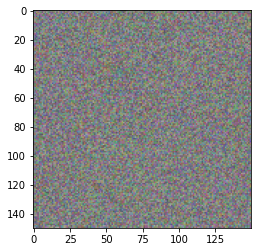

In [ ]:
plt.imshow(deprocess_image(input_img_data[0]))

**HOMEWORK 2**:

Write a function that takes as arguments the name of the layer and filter index and outputs the displayable filter response.  
Then you can choose different filters and visualize which patterns they are responsive too! Submit the code (as Notebook) and at least 3 filter responses (a PDF file).

In [ ]:
def filter_response(layer_name, filter_index):
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:, :, :, filter_index])
  grads = K.gradients(loss, model.input)[0]
  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
  iterate = K.function([model.input], [loss, grads])
  loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])
  input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
  step = 1.
  for i in range(40):
      loss_value, grads_value = iterate([input_img_data])
      input_img_data += grads_value * step
  return deprocess_image(input_img_data[0])

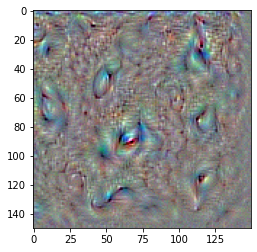

In [ ]:
layer_name = 'block5_conv3'
filter_index = 5
r = filter_response(layer_name, filter_index)
plt.imshow(r)

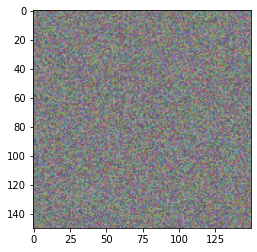

In [ ]:
layer_name = 'block5_conv3'
filter_index = 6
r = filter_response(layer_name, filter_index)
plt.imshow(r)

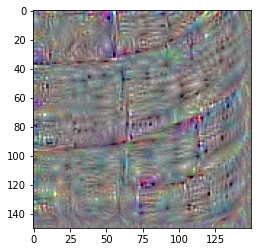

In [ ]:
layer_name = 'block5_conv3'
filter_index = 8
r = filter_response(layer_name, filter_index)
plt.imshow(r)

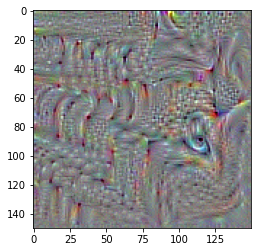

In [ ]:
layer_name = 'block5_conv3'
filter_index = 12
r = filter_response(layer_name, filter_index)
plt.imshow(r)